Import the boston dataset from scikit-learn library and perform a linear regression based on the "RM" (average number of rooms per dwelling) to predict the "MEDV"(Median value of owner-occupied homes in $1000's). 

Visualize the relationship between the variables.

Perfrom linear regression, draw the learning and validation curves and give your interpretations of the same. (Please refer the book for plotting and interpreting the learning and validation curves)

Compare the coefficients from the closed form equation, sklearn and stochastic gradient descent. 

Plot your predcitions on a graph.

In [9]:
from sklearn import datasets
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
boston_data=datasets.load_boston()
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston=pd.DataFrame(boston_data.data)
print(boston.head())
boston.columns = boston_data.feature_names
print(boston.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  

In [6]:
boston['MEDV'] = boston_data.target
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


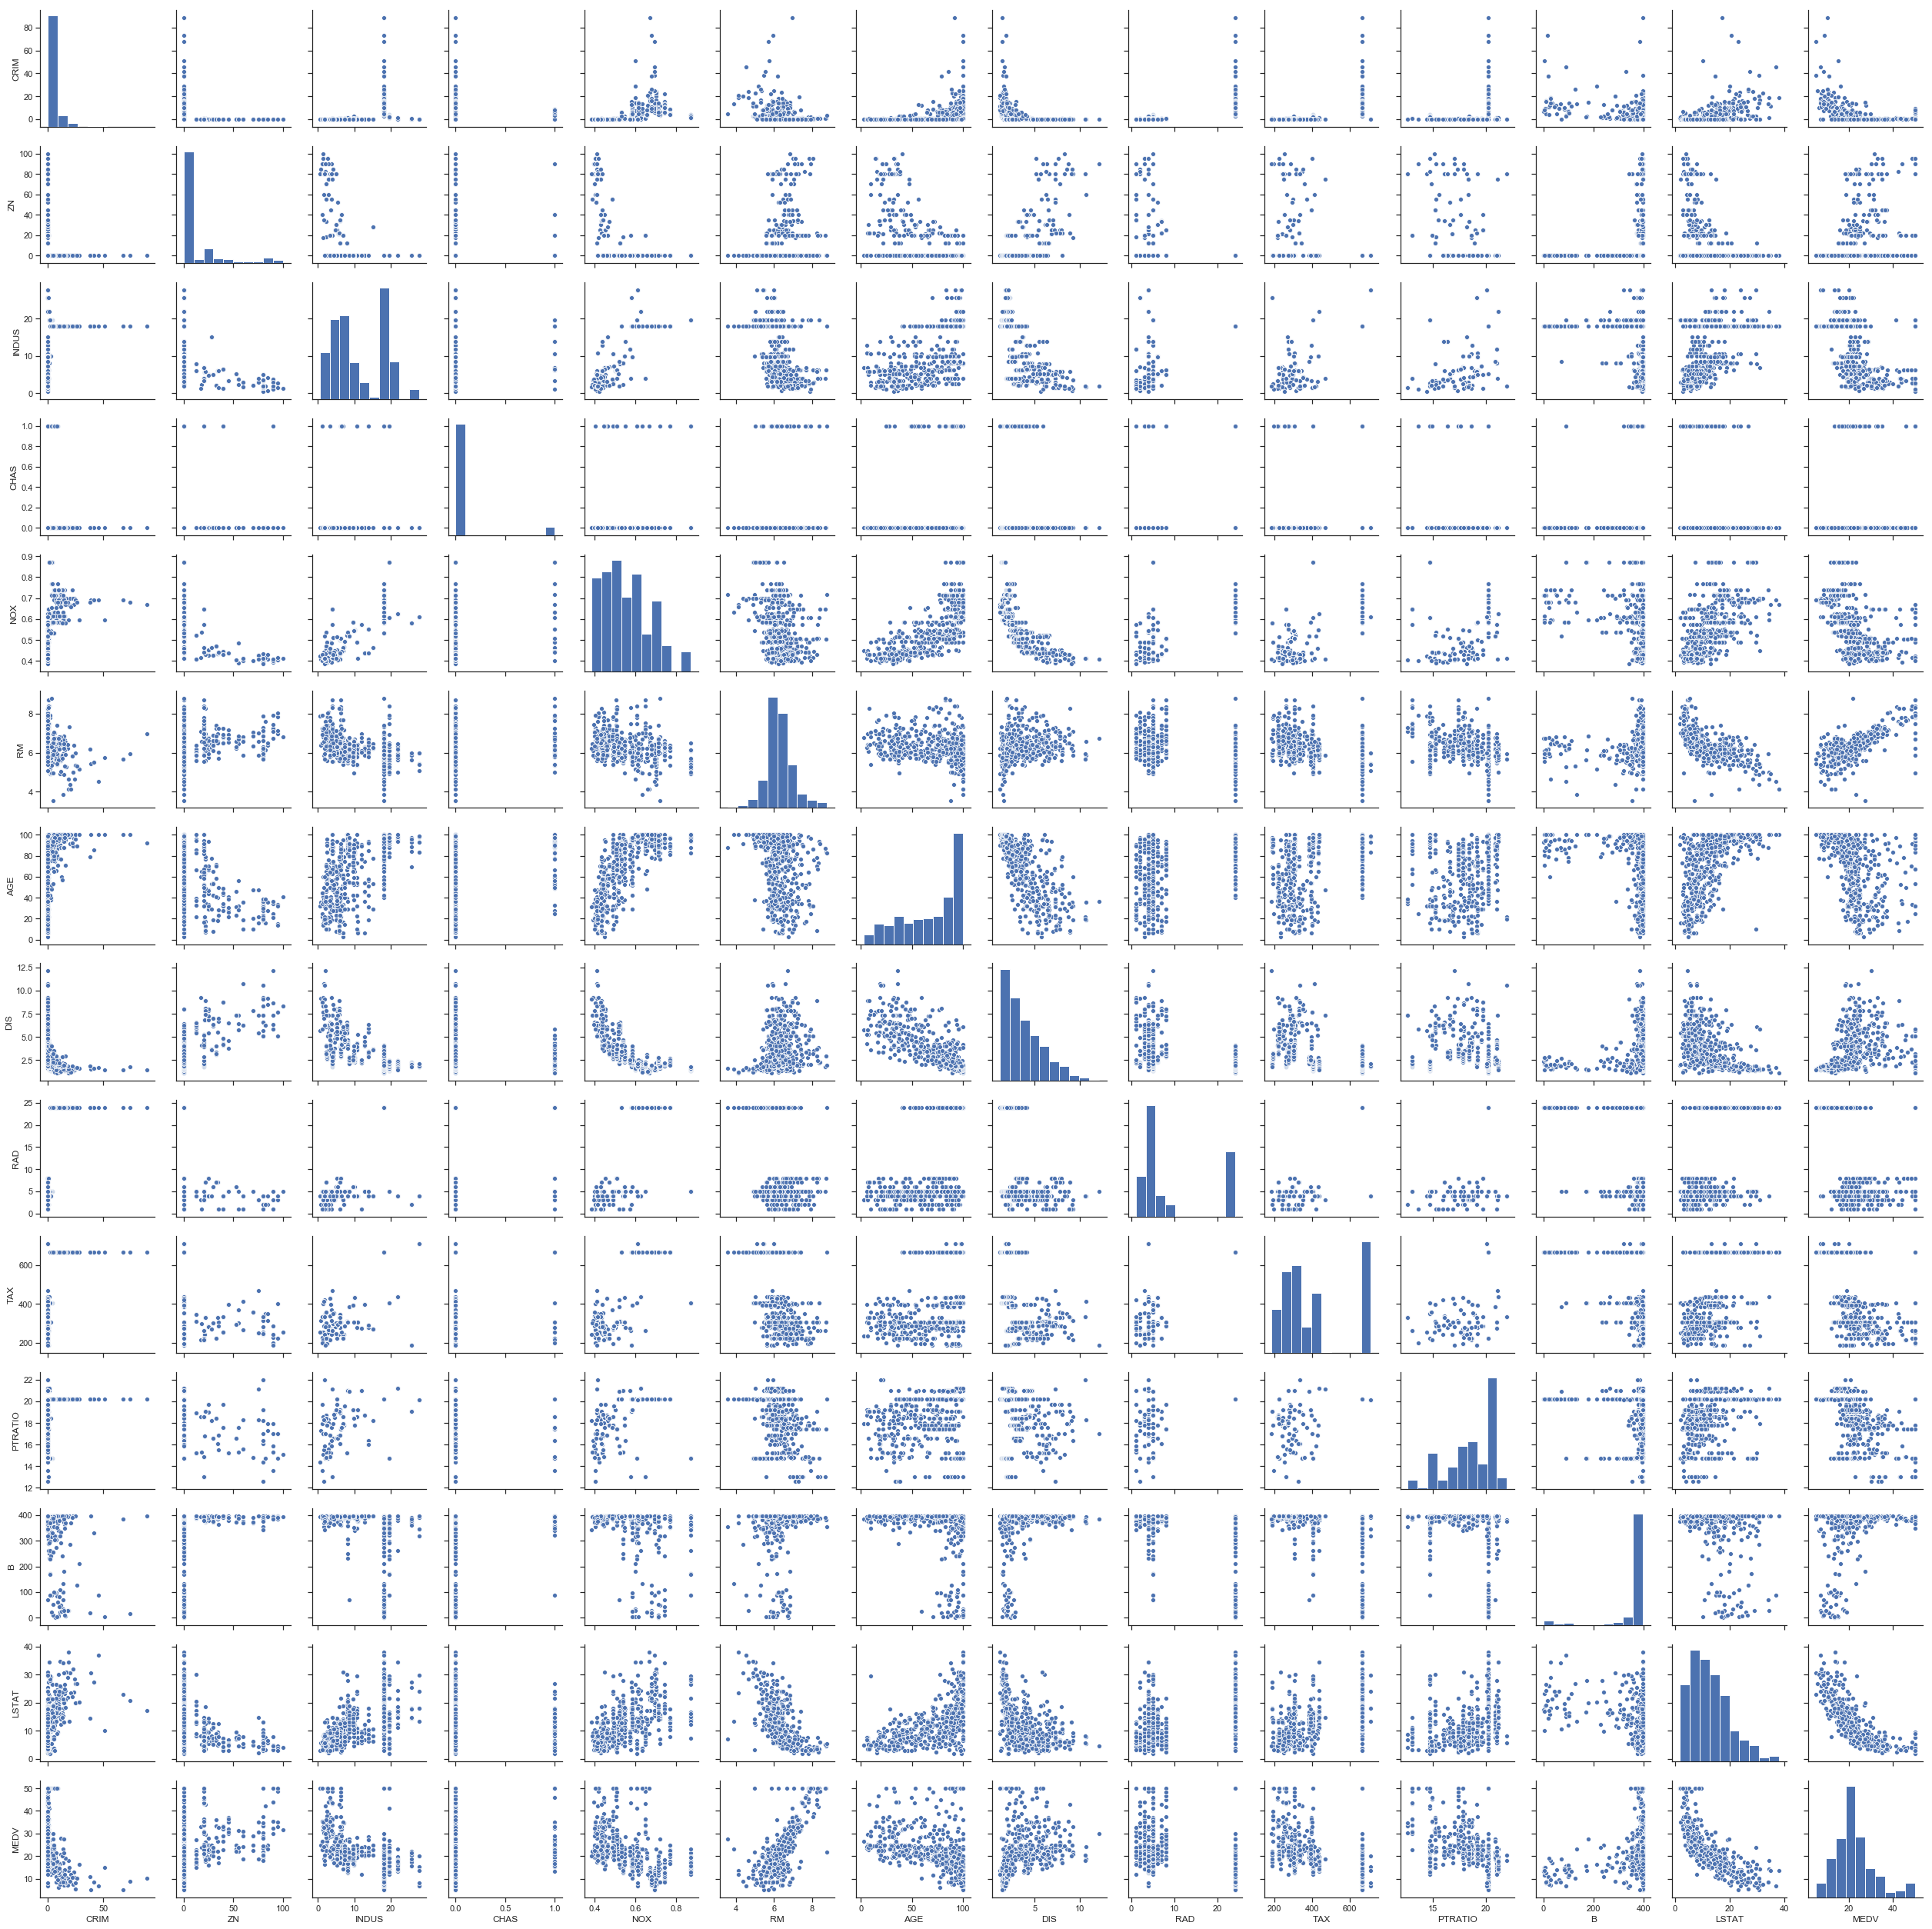

In [7]:
#scatterplot of all the variables
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(boston)

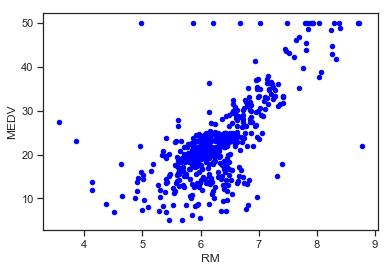

In [8]:
# RM vs MEDV
plot_one=boston.plot.scatter(x='RM',y='MEDV',c='blue')

In [10]:
X=boston['RM']
y=boston['MEDV']
X=pd.DataFrame(X)
y=pd.DataFrame(y)
#X_reshape=X.values.reshape(-1,1)
#y_reshape=y.values.reshape(-1,1)
#features=['RM']
#X_b=np.c_[np.ones((len(boston[features]),1)),boston[features].values]
#X_b.shape

In [28]:
print(type(X), X.ndim, X.shape, type(y),y.ndim, y.shape)

<class 'pandas.core.frame.DataFrame'> 2 (506, 1) <class 'pandas.core.frame.DataFrame'> 2 (506, 1)


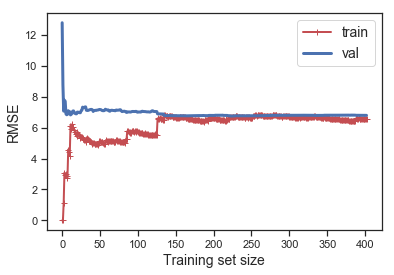

(array([-34.67062078]), array([[9.10210898]]))

In [11]:
#Linear Regression using sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)  
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)   
plt.show() 
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
#In the training data, when there are less instances, the model fits good and so the curve starts at 0. When new instances are added, because the data is noisy and non-linear, it becomes impossible to for the model to fit the training data. So, the error rises till it reaches a saturation. In validation-model, when there are less training instances, generalization is difficult, so the error is high. When more instances are added, error decreases slowly. However once it reaches saturation, it can’t be much better.  So, training and validation curve are near to each other.

In [19]:
#Closed Form
X_b=np.c_[np.ones((len(X),1)),X]
X_b.shape
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[-34.67062078]
 [  9.10210898]]


[[ 1.73781515]
 [47.24836005]]


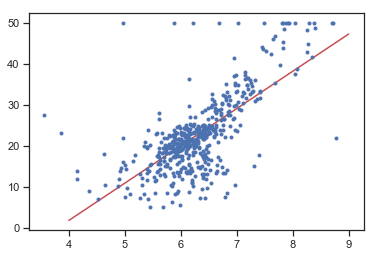

In [21]:
X_new = np.array([[4], [9]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

In [31]:
#Sklearn
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([-34.67062078]), array([[9.10210898]]))

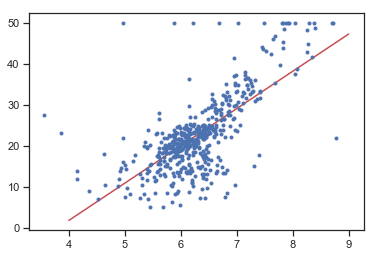

array([[ 1.73781515],
       [47.24836005]])

In [29]:
y_predict_sklearn=lin_reg.predict(X_new)
plt.plot(X_new, y_predict_sklearn, "r-")
plt.plot(X, y, "b.")
plt.show()
y_predict_sklearn

In [25]:
#SGD
from sklearn.linear_model import SGDRegressor #SGD using scikit-learn
sgd_reg=SGDRegressor(n_iter=100,penalty=None,eta0=0.1)
sgd_reg.fit(X,y)
sgd_reg.intercept_,sgd_reg.coef_

C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Arpita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([-34.72671861]), array([9.10495206]))

In [26]:
sgd_reg.intercept_,sgd_reg.coef_
y_predict_sgd=sgd_reg.predict(X_new)
y_predict_sgd

array([ 1.69308962, 47.2178499 ])

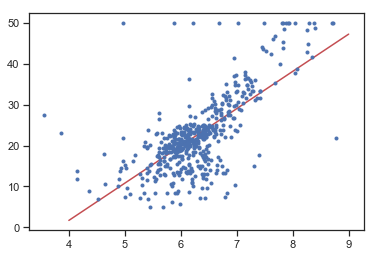

In [27]:
plt.plot(X_new, y_predict_sgd, "r-")
plt.plot(X, y, "b.")
plt.show()

In [ ]:
# Coeffecients:
#Closed form:  [[-34.67062078] [  9.10210898]]
#sklearn: (array([-34.67062078]), array([[9.10210898]]))
#SGD: (array([-34.72671861]), array([9.10495206]))